In this notebook, I build a tensorflow model to predict the price of Bit coin.  I will prepare for the project by initializing the time series fundamentals using TensorFlow .

Though the project aims at predicting the price of bitcoin. **Note: this is not a financial advice**
 because even deep learning models fail to predict in open systems like stock markets and crypto currency markets though they work better in closed systems.


# What I'm Going to cover
1. Download and format time series data (the historical price of Bitcoin)
2. Writing  a processing function to prepare our time series data
3. Setting up multiple time series modelling experiments
4. Building a multivariate model to take in mlutlivariate time series data
5. Replicationg the N-BEATS Algorithm
6. Making forecasts with prediction intervals?uncertainty intervals
7. Demonstrating why time seris forecasting can crap wht turkye problem

# Getting the data
The data is sourced from Bitcoin price data : https://finance.yahoo.com/quote/BTC-USD/history/

In [1]:
# Import data with pandas
import pandas as pd
df = pd.read_csv('/content/BTC-USD.csv', parse_dates=["Date"], index_col=['Date'])
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-10,17192.949219,17484.720703,17162.990234,17446.292969,17446.292969,15808338949
2023-01-11,17446.359375,17934.896484,17337.994141,17934.896484,17934.896484,18372283782
2023-01-12,18117.593750,19030.087891,17995.203125,18869.587891,18869.587891,34971338710
2023-01-13,18868.906250,19964.322266,18753.164063,19909.574219,19909.574219,29225029694
2023-01-14,19910.537109,21075.142578,19907.828125,20976.298828,20976.298828,38967784639
...,...,...,...,...,...,...
2024-01-06,44178.953125,44227.632813,43475.156250,43989.195313,43989.195313,16092503468
2024-01-07,43998.464844,44495.570313,43662.230469,43943.097656,43943.097656,19330573863
2024-01-08,43948.707031,47218.000000,43244.082031,46970.503906,46970.503906,42746192015


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2023-01-10 to 2024-01-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       366 non-null    float64
 1   High       366 non-null    float64
 2   Low        366 non-null    float64
 3   Close      366 non-null    float64
 4   Adj Close  366 non-null    float64
 5   Volume     366 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.0 KB


In [3]:
len(df)

366

**NB:** Notice that the data is not sufficient for our deep learning model. Small number of samples is very common in time series problems. These type of  models relish large amounts of data. We need to get more data

I am going to use 3 sets of data for these project. The first is the experimenta project and then I'll use those insight, procedures and knowledge to tacke the remaining 3 datasets.
* BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
* bitcoin_csv.csv
* BTC-USD.csv


In [4]:
# Getting the experimental data
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=['Date'], index_col=['Date'])
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [5]:
len(df)

2787

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [7]:
# Clean the data only access closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)' : 'Price'})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


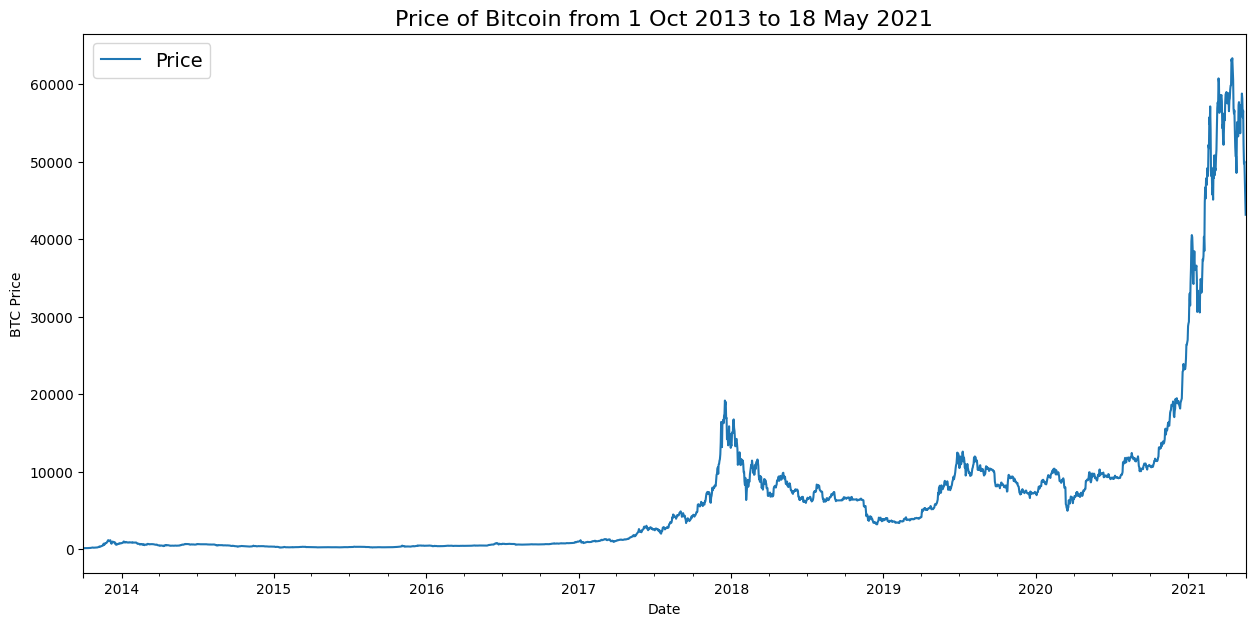

In [8]:
# Visualize the data
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(15,7))
plt.ylabel('BTC Price')
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python CSV module

In [9]:
# Importing and formating historical  Bicoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # Skip first line, this gets rid of the column titles
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get dates as dates not as string
    btc_price.append(float(line[2])) # Get the closing price as float


# Viw first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

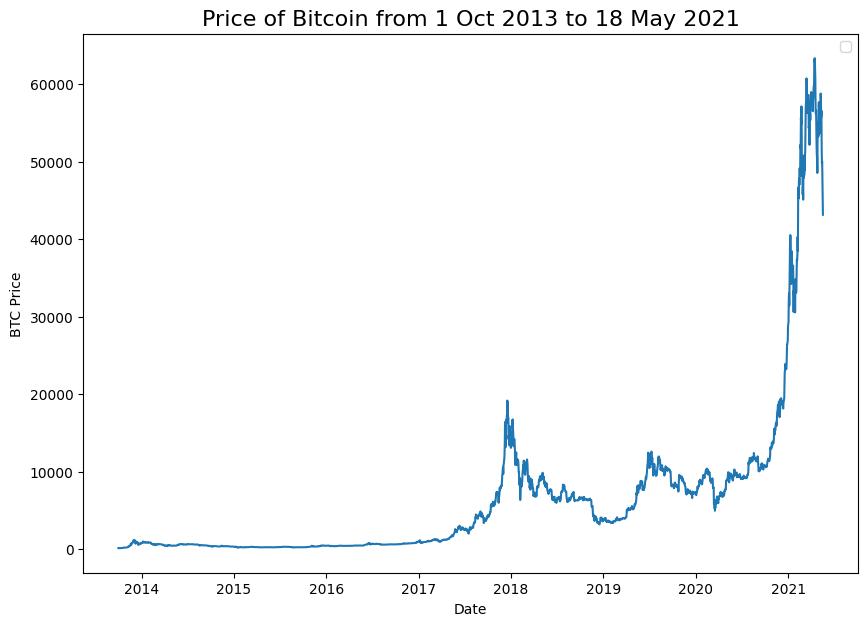

In [10]:
# Plot from csv
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend()
plt.xlabel("Date");

# Create train and test sets with time series data

## Method 1) Create time series data the wrong way

In [11]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]


(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices , # BTC prics
                                                    test_size = 0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

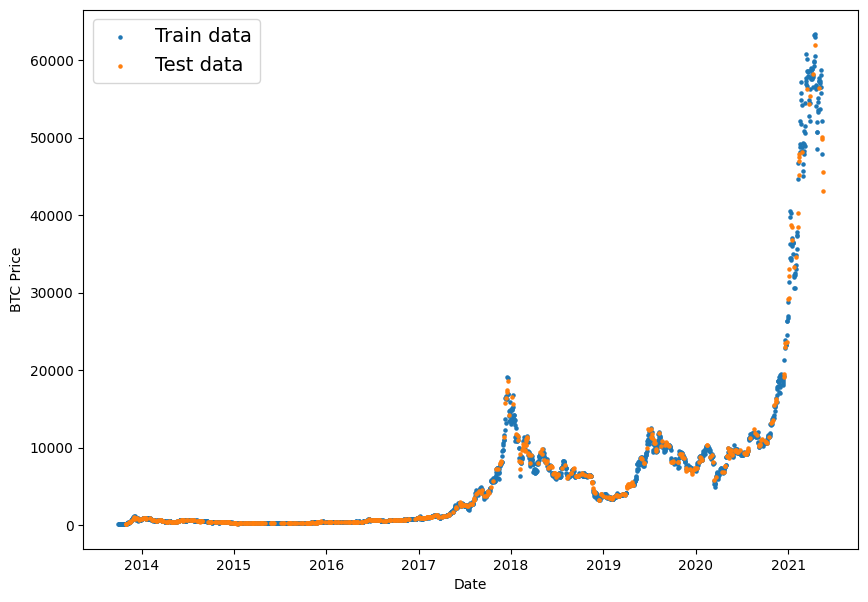

In [13]:
# Plottting the wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label = 'Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Since the aim is to use historical data to make predictions, Why is the above not ideal for our machine learning model:

 **Observations:**

 * The train and test split datasets are exactly the same. How then is the model suppossed to find patterns. This is will result in an overfitting problem.

 * From the above graph, its clear that there is a data leak due to the random split.

In [14]:
# Create train and test splits the right way for time series data
split_size = int(0.8* len(prices)) # 80% train and 20% split. Change the values as needed.

# Create train data splits (everyting before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everying beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

### Plot the correctly made splits

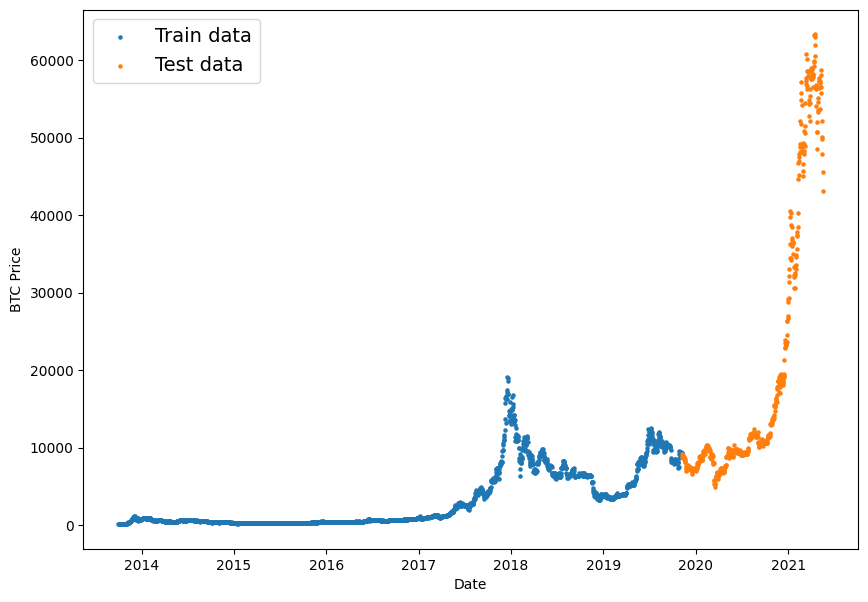

In [15]:
# Plottting the correct train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label = 'Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

# Create a plotting Function to visualize the plots

In [16]:
def plot_time_series(timesteps, values, format='', start=0, end=None, label=None):
  """"
  Plots timesteps (a series of points in time) against values (a series of values across timsteps )

  Parameters
  ----------

  timesteps: array of timestep values
  values: array of values across time
  format: style of plot, default "."
  start : where to start the plot(setting a value will index from start of timesteps)
  end : where to find the plot (similar to start but for the end)
  label: label to show on plot about values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


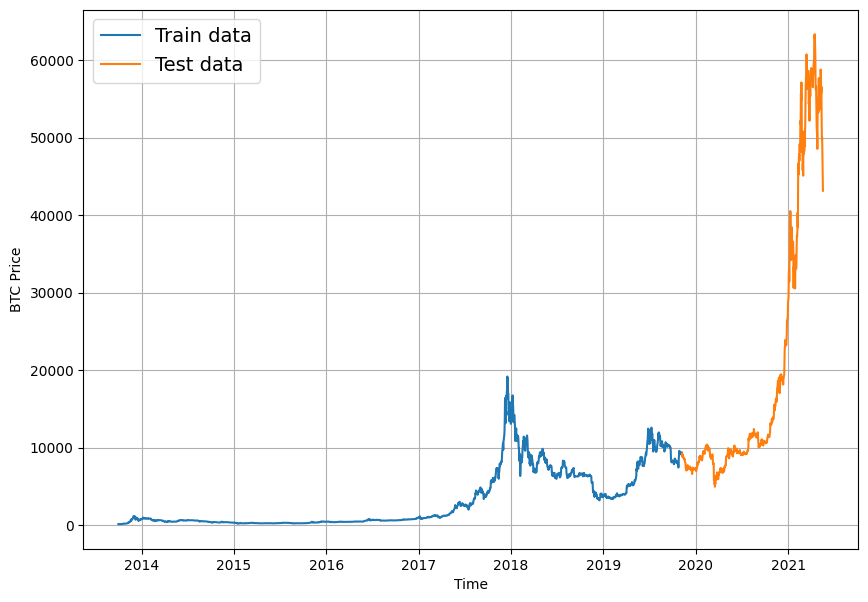

In [17]:
# Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test,  label='Test data')

# Modelling

### Baseline model = Naive model forecasting

In [18]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

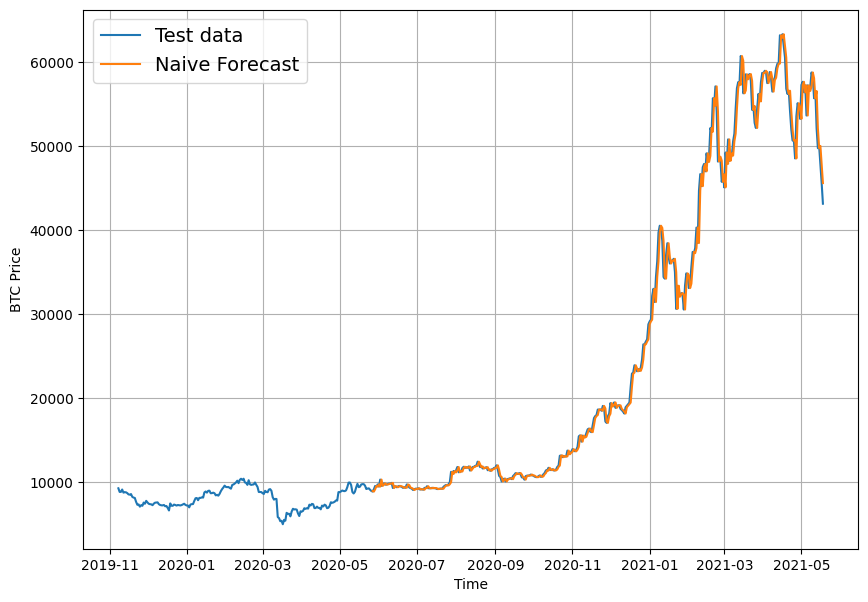

In [19]:
# plot the naive forecast
plt.figure(figsize=(10, 7))
#plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, format='-', label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast,  start= 200, format="-", label="Naive Forecast")

# Evaluation metrics for time series forecasting

In [20]:
import tensorflow as tf

# Create an evaluation function
def mean_absolute_scaled_error(y_true, y_pred):
  """
  implement MASE (assuming no seasonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))  # Our seasonality is 1 day hence the shift of 1

  return mae / mae_naive_no_season


In [21]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [22]:
# Creating a function to take in the model prediction and truth values and returns evaluation values
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"MAE": mae.numpy(),
          "MSE": mse.numpy(),
          "RMSE": rmse.numpy(),
          "MAPE": mape.numpy(),
          "MASE": mase.numpy()}

In [23]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.5165248,
 'MASE': 0.99957}

In [24]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [25]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [27]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

# Use Window for deep learning model

In [28]:
len(y_train)

2229

In [34]:
# What to expect from the bitcoin data
print(f"We want to use : {btc_price[:7]} to predict this : {btc_price[7]}")

We want to use : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this : 123.033


In [39]:
# Create function that does the above

# Create global variables
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # Use the past week of Bitcoin data to make the prediction

In [50]:
from re import X
def get_labelled_window(x, horizon=HORIZON):
  """
  Creates labels for windowed datast.
  e.g if horizon=1
  Input : [0, ,1 ,2, 3, 4, 5, 6 ,7] -> Outut: ([0, 1 ,2 ,3 ,4 ,5 ,6, [7]])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [52]:
# Test out the window labelling function
test_window , test_label= get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [1 2 3 4 5 6 7] -> Label: 8


Do the above across the entire time series data

# Turning the Complete data into Horizons and Windows


###  Using Numpy array indexing
The function will:
1. Create a window step of specific window size (e.g . [0,1,2,3,4,5,6])
2  Use `Numpy Indexing` to create a 2D array of multiple window steps, for example:
```
[[0,1,2,3,4,5,6],
[1,2,3,4,5,6,7],
[2,3,4,5,6,7,8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series(e.g the historical price of Bitcoin)
4. Uses the `get_labelled_window` function to turn the window with a specified horizon

In [63]:
# Create function to view Numpy Arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels:
  """

  # 1. Creeate a window of specific window size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array or multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange((len(x)-window_size+horizon-1)), axis=0).T # Create 2d array of windows of size WINDOW_SIZE


  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels


In [68]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows),len(full_labels)

Window indexes: 
 (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [71]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> [43144.47129086]


In [73]:
# Does it work?
prices[-1]

43144.4712908603

# Using the TensorFlow Method - tf.keras.preprocessing.timeseries_dataset_from_array

### Time Series train and test sets

In [79]:
# Make the train/test splits
def make_train_test_spits(windows, label, test_split=0.2):
  '''
  Splits matching pairs of windows and labels into train and test splits
  '''
  split_size = int(len(windows) * (1-test_split)) # This will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = windows[:split_size]
  test_windows = windows[split_size:]
  test_labels = windows[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [81]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_spits(full_windows, full_labels)
len(train_windows),len(test_windows) , len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [82]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]))

In [83]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
      